In [49]:
import csv
from matplotlib import pyplot as plt
import numpy as np
import math
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [50]:
df = pd.read_csv('data1.csv')
df

,GPS Time,Device Time,Longitude,Latitude,GPS Speed (Meters/second),Horizontal Dilution of Precision,Altitude,Bearing,G(x),G(y),G(z),G(calibrated),Engine RPM(rpm),Speed (OBD)(km/h),Acceleration Sensor(Total)(g),Litres Per 100 Kilometer(Instant)(l/100km),Speed (GPS)(km/h),Acceleration Sensor(Z axis)(g)
0,Fri Mar 25 17:18:15 GMT+03:00 2016,25-Mar-2016 17:18:08.672,37.583105,55.848558,1.0,14.0,143.0,0.0,-1.069122,8.187592,4.949341,0.002015,-,0.0,0.002015,-,3.5999999046325684,0.405627
1,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:08.767,37.583102,55.848554,1.0,14.0,143.0,0.0,-1.529938,8.353485,5.078201,0.027657,-,0.0,0.027657,-,3.5999999046325684,0.417656
2,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:08.867,37.583102,55.848554,1.0,14.0,143.0,0.0,-1.483780,8.233429,4.653717,0.016112,-,0.0,0.016112,-,3.5999999046325684,0.374385
3,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:08.966,37.583102,55.848554,1.0,14.0,143.0,0.0,-1.489288,8.442078,4.666107,0.015226,-,0.0,0.015226,-,3.5999999046325684,0.375648
4,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:09.067,37.583102,55.848554,1.0,14.0,143.0,0.0,-0.720825,8.725891,4.743317,0.034077,-,0.0,0.034077,-,3.5999999046325684,0.383519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22276,Fri Mar 25 17:55:28 GMT+03:00 2016,25-Mar-2016 17:55:21.259,37.525679,55.738373,0.0,4.0,166.0,0.0,0.998703,9.563507,1.149261,0.006151,599.5,0.0,0.006151,-,0.0,0.017152
22277,Fri Mar 25 17:55:28 GMT+03:00 2016,25-Mar-2016 17:55:21.358,37.525679,55.738373,0.0,4.0,166.0,0.0,1.070480,9.641998,1.154083,0.006844,601.25,0.0,0.006844,-,0.0,0.017644
22278,Fri Mar 25 17:55:28 GMT+03:00 2016,25-Mar-2016 17:55:21.458,37.525679,55.738373,0.0,4.0,166.0,0.0,1.026428,9.537384,1.169113,0.006450,601.25,0.0,0.006450,-,0.0,0.019176
22279,Fri Mar 25 17:55:28 GMT+03:00 2016,25-Mar-2016 17:55:21.557,37.525679,55.738373,0.0,4.0,166.0,0.0,0.681564,8.894714,1.603546,-0.057069,609.0,0.0,-0.057069,-,0.0,0.063460


# Разминка 1

In [51]:
time = df.iloc[:, 1].values.tolist()
longitude = df.iloc[:, 2].values.tolist()
latitude = df.iloc[:, 3].values.tolist()

time = [x[12:] for x in time]

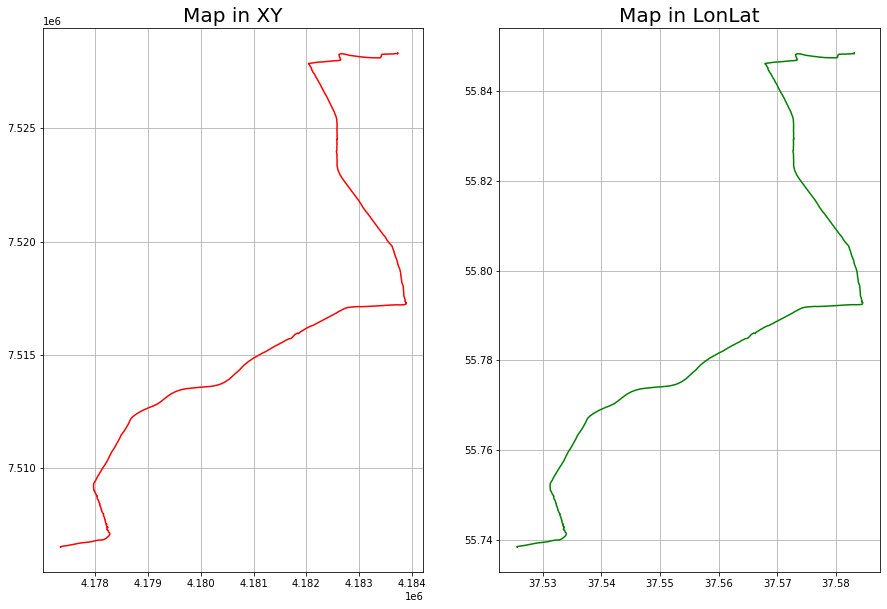

In [52]:
f=plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

cy = []
cx = []
R = 6378137  # Radius of earth in M

for i in range(len(longitude)):
    cy.append(math.log(math.tan(math.pi / 4 + math.radians(latitude[i]) / 2)) * R)
    cx.append(math.radians(longitude[i]) * R)
        
plt.subplot(121)
plt.plot(cx,cy,'r')
plt.title('Map in XY', fontsize=20)
plt.grid()

plt.subplot(122)
plt.plot(longitude,latitude,'g')
plt.title('Map in LonLat', fontsize=20)
plt.grid()

In [53]:
import folium

mymap = folium.Map(location=[latitude[0], longitude[0]], zoom_start=15)
folium.Marker([latitude[0], longitude[0]], popup = 'START').add_to(mymap) 
folium.Marker([latitude[-1], longitude[-1]], popup = 'FINISH').add_to(mymap) 
folium.PolyLine(list(zip(latitude[::10], longitude[::10])), color="red").add_to(mymap)

mymap

# Разминка 2

In [54]:
time_OBD = df.iloc[:, 1].values.tolist()
speed_OBD = df.iloc[:, 13].values.tolist()
time_GPS = df.iloc[:, 0].values.tolist()
speed_GPS = df.iloc[:, 16].values.tolist()

In [55]:
time_GPS = [x[11:19] for x in time_GPS]
time_OBD = [x[12:] for x in time_OBD]

In [56]:
speed_GPS = [x for x in speed_GPS if all(c.isdigit() or c == '.' for c in x)]

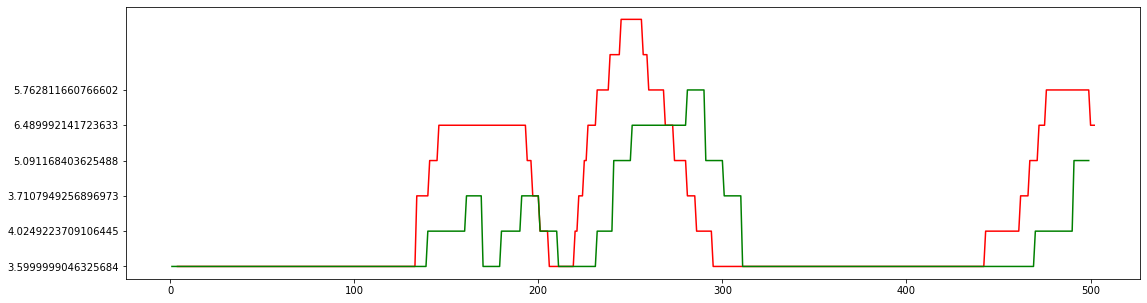

In [57]:
f=plt.figure()
f.set_figwidth(40)
f.set_figheight(5)

plt.subplot(121)
plt.plot([i for i in range(len(time_OBD))][4:503], speed_OBD[4:503],'r')
plt.plot([i for i in range(len(time_GPS))][1:500], speed_GPS[1:500],'g')

In [58]:
scaler = MinMaxScaler()

In [59]:
speed_OBD_1 = np.array([scaler.fit_transform(np.expand_dims(speed_OBD,axis = 1))])
speed_GPS_1 = np.array([scaler.fit_transform(np.expand_dims(speed_GPS,axis = 1))])

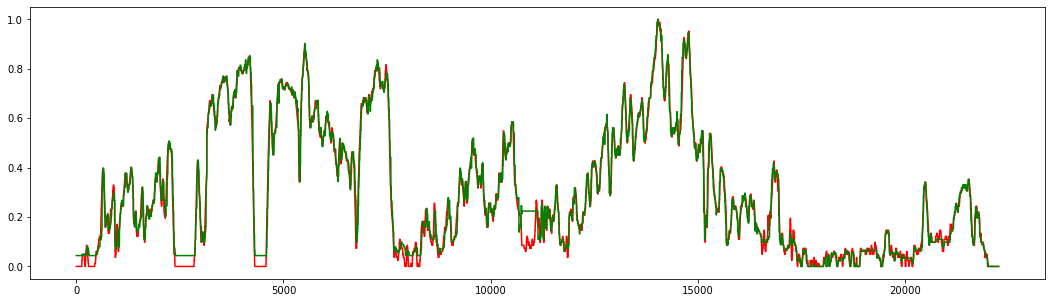

In [60]:
f=plt.figure()
f.set_figwidth(40)
f.set_figheight(5)

plt.subplot(121)
plt.plot([i for i in range(len(speed_GPS))], speed_OBD_1[0,:22261:,0],'r')
plt.plot([i for i in range(len(speed_GPS))], speed_GPS_1[0,::,0],'g')

# Разминка 3

In [61]:
time_GPS = df.iloc[:, 0].values.tolist()
speed_GPS = df.iloc[:, 16].values.tolist()
bearing = df.iloc[:, 7].values.tolist()

In [62]:
time_GPS = [x[11:19] for x in time_GPS]

In [63]:
speed_GPS = [x for x in speed_GPS if all(c.isdigit() or c == '.' for c in x)]

Text(0.5, 1.0, 'Bearing(t)')

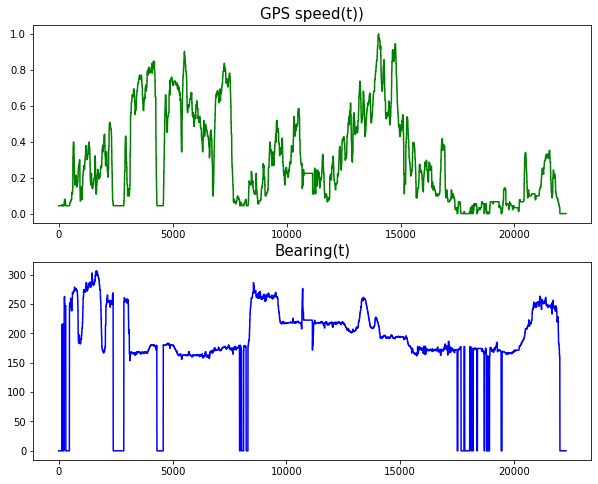

In [64]:
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(8)

plt.subplot(211)
plt.plot([i for i in range(len(speed_GPS))], speed_GPS_1[0,::,0],'g')
plt.title('GPS speed(t))',fontsize=15)

plt.subplot(212)
plt.plot([i for i in range(len(time_GPS))],bearing,'b')
plt.title('Bearing(t)', fontsize=15)

In [65]:
velx = []
vely = []
for i in range(len(speed_GPS)):
    V = float(speed_GPS[i])
    Vx = V*math.cos(bearing[i])
    Vy = V*math.sin(bearing[i])
    velx.append(Vx)
    vely.append(Vy)


Text(0.5, 1.0, 'Velocity_y(t))')

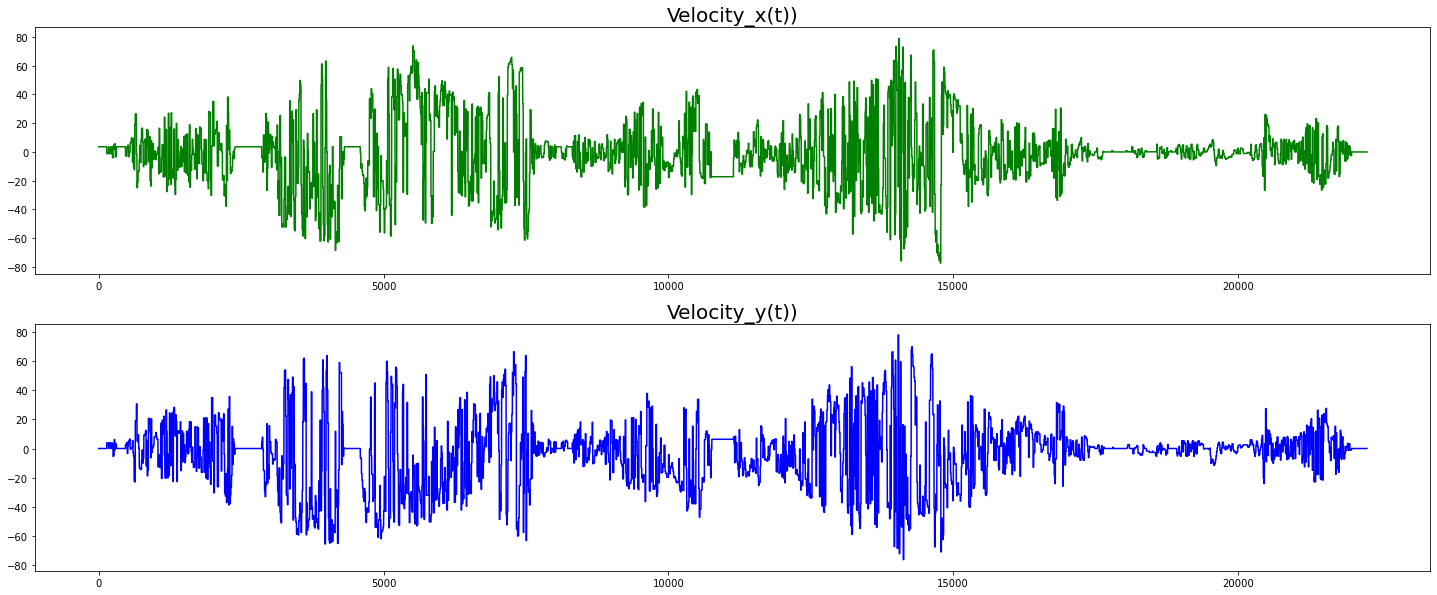

In [66]:
#глабольно вообще ничего не дает, 
#но вероятно если умножать скорость на время, то можно получить карту, если строить v(t) напрвленно

f=plt.figure()
f.set_figwidth(25)
f.set_figheight(10)

plt.subplot(211)
plt.plot([i for i in range(len(time_GPS[:22261]))], velx,'g')
plt.title('Velocity_x(t))',fontsize=20)

plt.subplot(212)
plt.plot([i for i in range(len(time_GPS[:22261]))],vely,'b')
plt.title('Velocity_y(t))',fontsize=20)

# Задание 1

In [67]:
speed_GPS = df.iloc[:, 16].values.tolist()
speed_OBD = df.iloc[:, 13].values.tolist()
time_OBD = df.iloc[:, 1].values.tolist()
time_GPS = df.iloc[:, 0].values.tolist()

In [68]:
time_GPS = [x[11:19] for x in time_GPS]

In [69]:
speed_GPS = [x for x in speed_GPS if all(c.isdigit() or c == '.' for c in x)]
speed_OBD = [str(x) for x in speed_OBD if isinstance(x, (int, float)) or (isinstance(x, str) and all(c.isdigit() or c == '.' for c in x))]

In [70]:
speed_GPS = [float(x) for x in speed_GPS]
speed_OBD = [float(x) for x in speed_OBD]

# Фильтр Калмана

In [71]:
def predict(mu1, var1, mu2, var2):
    var = var1 + var2
    mu = mu1 + mu2
    return mu, var

def update(mu1,var1,mu2,var2):
    k=var1/(var1+var2)
    var = k*var2
    mu = mu1*(1-k) + mu2*k
    
    return mu, var

def printg(t1,t,t2,time_GPS,correction,speed_GPS,speed_OBD):
    f=plt.figure()
    f.set_figwidth(20)
    f.set_figheight(10)
    plt.plot([i for i in range(len(time_GPS))][t1:t:t2], correction[t1//t2:t//t2:], label='kalman', c='b',linewidth = 5)
    plt.plot([i for i in range(len(time_GPS))][t1:t:t2], speed_OBD[t1:t:t2], label='OBD', c='r', linewidth = 3)
    plt.plot([i for i in range(len(time_GPS))][t1:t:t2], speed_GPS[t1:t:t2], label='GPS', c='g', linewidth = 3)
    plt.legend(fontsize = 18)

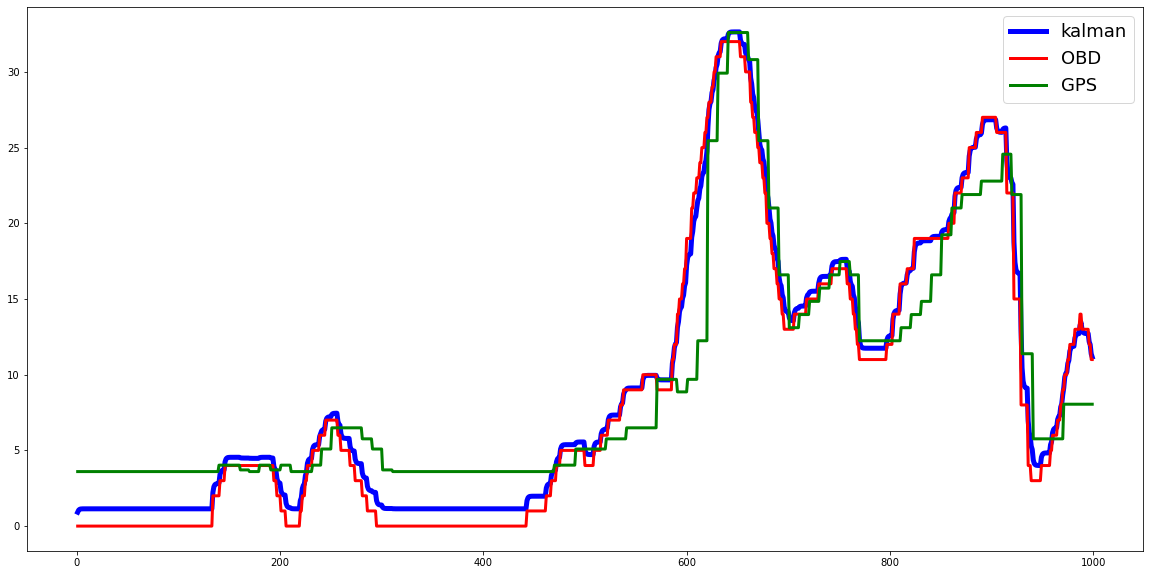

In [72]:
correction =[]

mu, sigma = 0, 80.

ksi_GPS = 10
ksi_OBD = 2

v=1
v_sigma = 2
    
t2 = 1
for t in range(1,len(speed_GPS),t2):
    
    mu, sigma = predict(mu, sigma, v, v_sigma)
    
    meas_GPS, meas_OBD = speed_GPS[t-1], speed_OBD[t-1] 
    
    mu2, sigma2 = update(meas_OBD, ksi_OBD, meas_GPS, ksi_GPS)
    
    mu, sigma = update(mu, sigma, mu2, sigma2)
    
    correction.append(mu)

printg(1,1000,t2,time_GPS,correction,speed_GPS,speed_OBD)

# Фильтр Калмана при пропадании данных с GPS

In [73]:
speed_GPS = df.iloc[:, 16].values.tolist()
speed_OBD = df.iloc[:, 13].values.tolist()
time_OBD = df.iloc[:, 1].values.tolist()
time_GPS = df.iloc[:, 0].values.tolist()

In [74]:
time_GPS = [x[11:19] for x in time_GPS]

In [75]:
speed_GPS = [x for x in speed_GPS if all(c.isdigit() or c == '.' for c in x)]
speed_OBD = [str(x) for x in speed_OBD if isinstance(x, (int, float)) or (isinstance(x, str) and all(c.isdigit() or c == '.' for c in x))]

In [76]:
speed_GPS = [float(x) for x in speed_GPS]
speed_OBD = [float(x) for x in speed_OBD]

In [77]:
start_time = "17:25:00"
end_time = "17:35:00"

first_index = time_GPS.index(start_time)

last_index = len(time_GPS) - 1 - time_GPS[::-1].index(end_time)

speed_GPS[first_index:last_index] = [0] * (last_index - first_index)

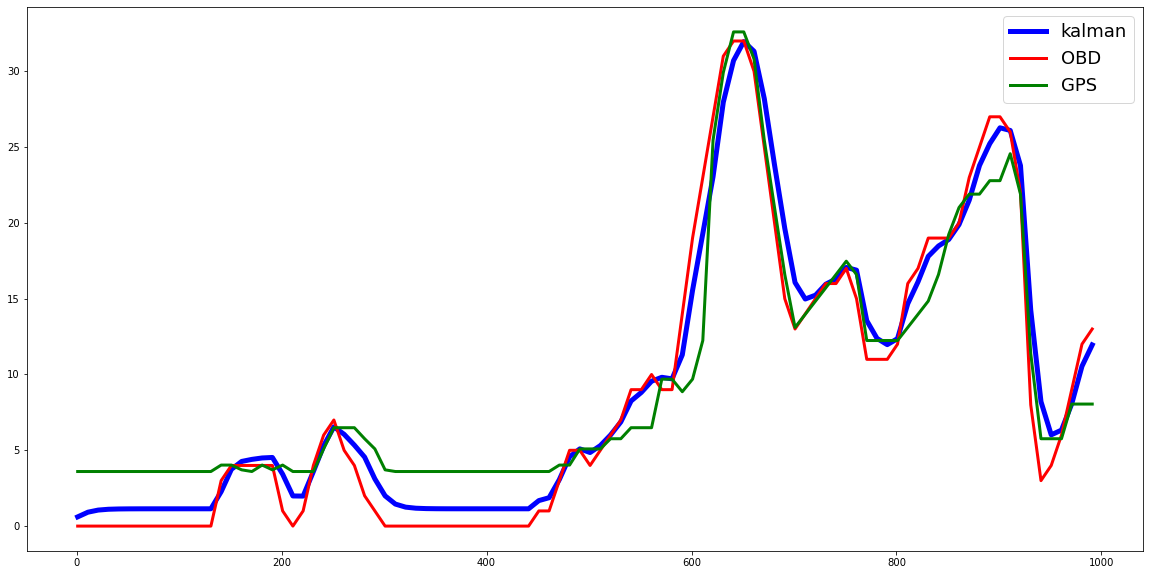

In [78]:
correction =[]

mu, sigma = 0, 80.

ksi_GPS = 10
ksi_OBD = 2

v=1
v_sigma = 2
    
t2 = 10
for t in range(1,len(speed_GPS),t2):

    mu, sigma = predict(mu, sigma, v, v_sigma)
    
    meas_GPS = 0 if speed_GPS[t-1] == 0. else speed_GPS[t-1]
    meas_OBD = speed_OBD[t-1]
    
    mu2, sigma2 = update(meas_OBD, ksi_OBD, meas_GPS, ksi_GPS)
    mu, sigma = update(mu, sigma, mu2, sigma2)
    
    correction.append(mu)

printg(1,1000,t2,time_GPS,correction,speed_GPS,speed_OBD)


# Фильтр Калмана при пропадании данных с OBD

In [79]:
speed_GPS = df.iloc[:, 16].values.tolist()
speed_OBD = df.iloc[:, 13].values.tolist()
time_OBD = df.iloc[:, 1].values.tolist()
time_GPS = df.iloc[:, 0].values.tolist()

In [80]:
time_GPS = [x[11:19] for x in time_GPS]
time_OBD = [x[12:20] for x in time_OBD]

In [81]:
speed_GPS = [x for x in speed_GPS if all(c.isdigit() or c == '.' for c in x)]
speed_OBD = [str(x) for x in speed_OBD if isinstance(x, (int, float)) or (isinstance(x, str) and all(c.isdigit() or c == '.' for c in x))]

In [82]:
speed_GPS = [float(x) for x in speed_GPS]
speed_OBD = [float(x) for x in speed_OBD]

In [83]:
start_time = "17:40:00"
end_time = "17:50:00"

first_index = time_OBD.index(start_time)

last_index = len(time_OBD) - 1 - time_OBD[::-1].index(end_time)

speed_OBD[first_index:last_index] = [0] * (last_index - first_index)

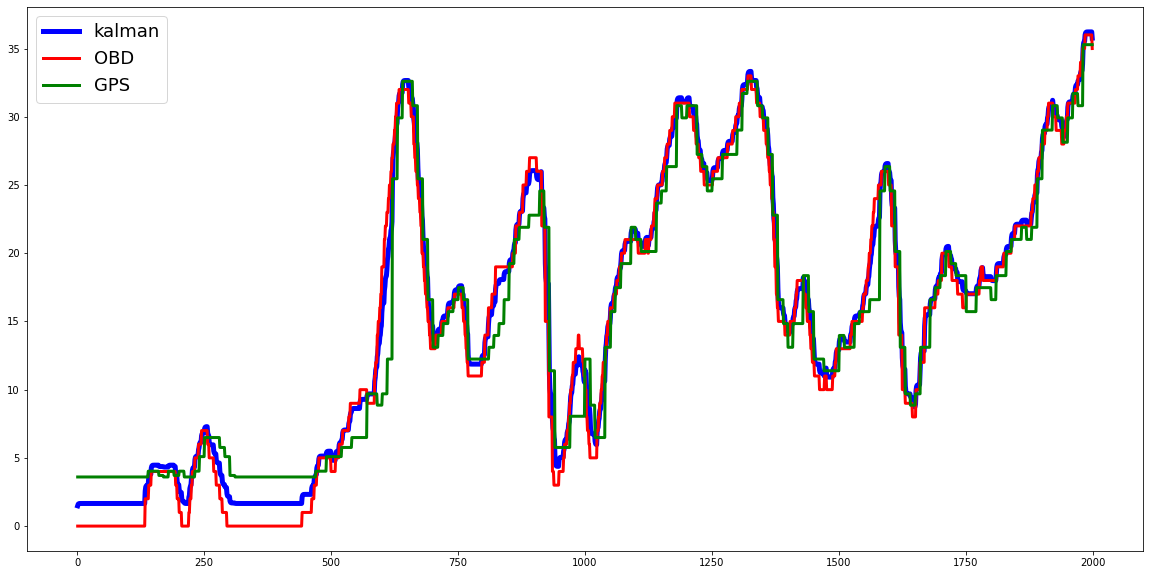

In [84]:
correction =[]

mu, sigma = 0, 80.
 
ksi_GPS = 4.
ksi_OBD = 2.

t2 = 1
for t in range(1,len(speed_GPS),t2):
    
    mu, sigma = predict(mu, sigma, v, v_sigma)
    
    meas_GPS = speed_GPS[t-1]
    meas_OBD = 0 if speed_OBD[t-1] == 0. else speed_OBD[t-1]
    
    mu2, sigma2 = update(meas_OBD, ksi_OBD, meas_GPS, ksi_GPS)
    mu, sigma = update(mu, sigma, mu2, sigma2)
    
    correction.append(mu)
    
printg(1,2000,t2,time_GPS,correction,speed_GPS,speed_OBD)